# Chapter 9. Constrained optimization  

## 9-1. Landscape of constrained optimization
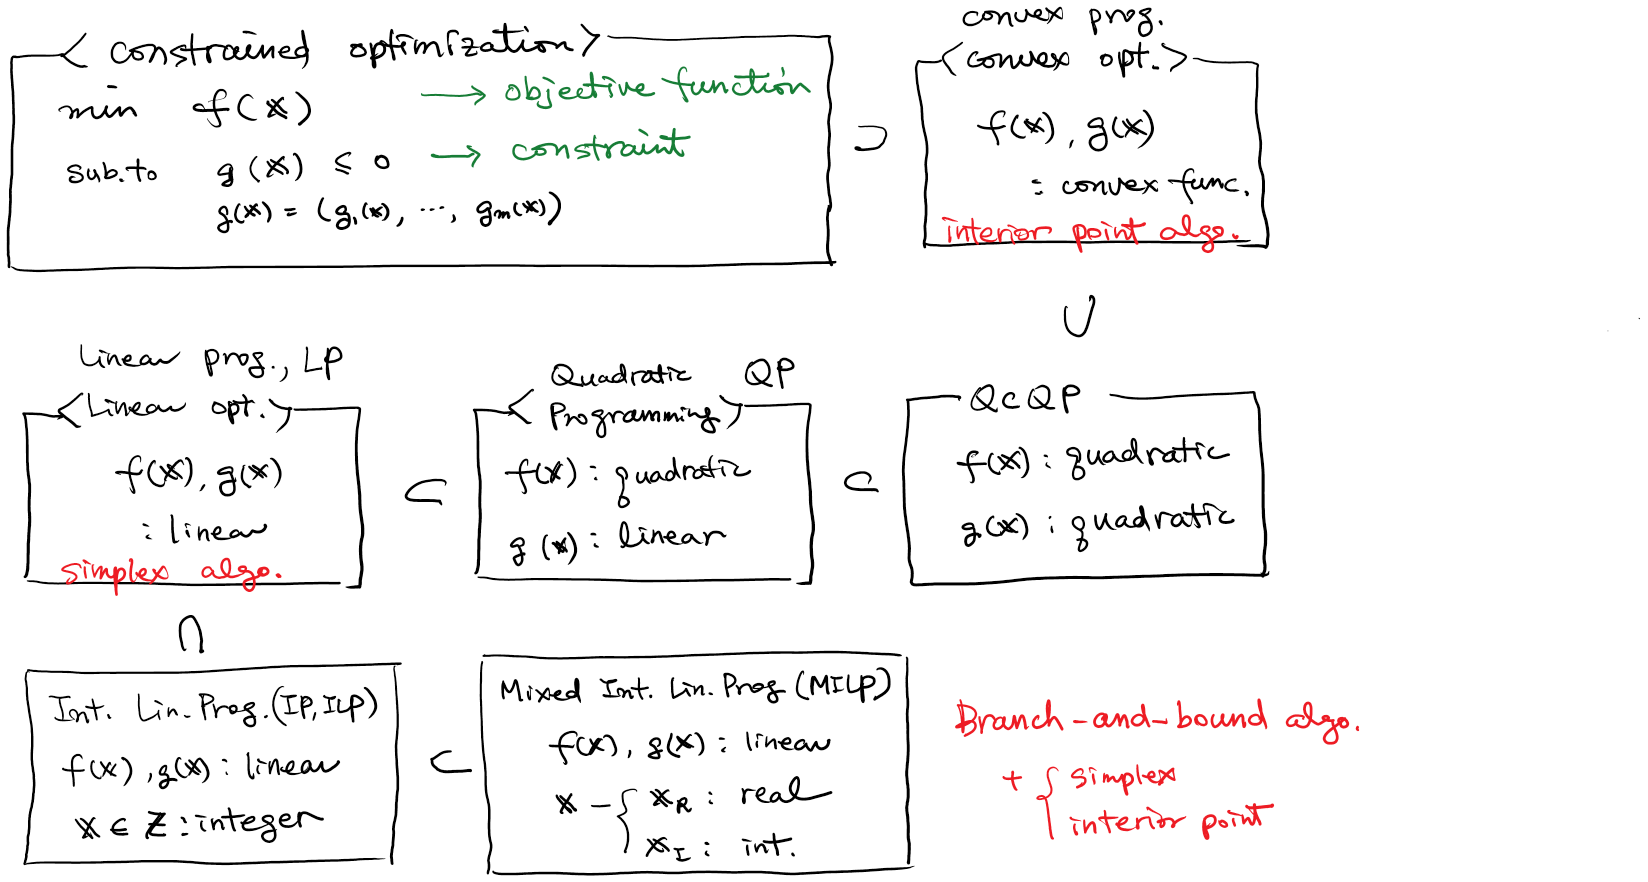

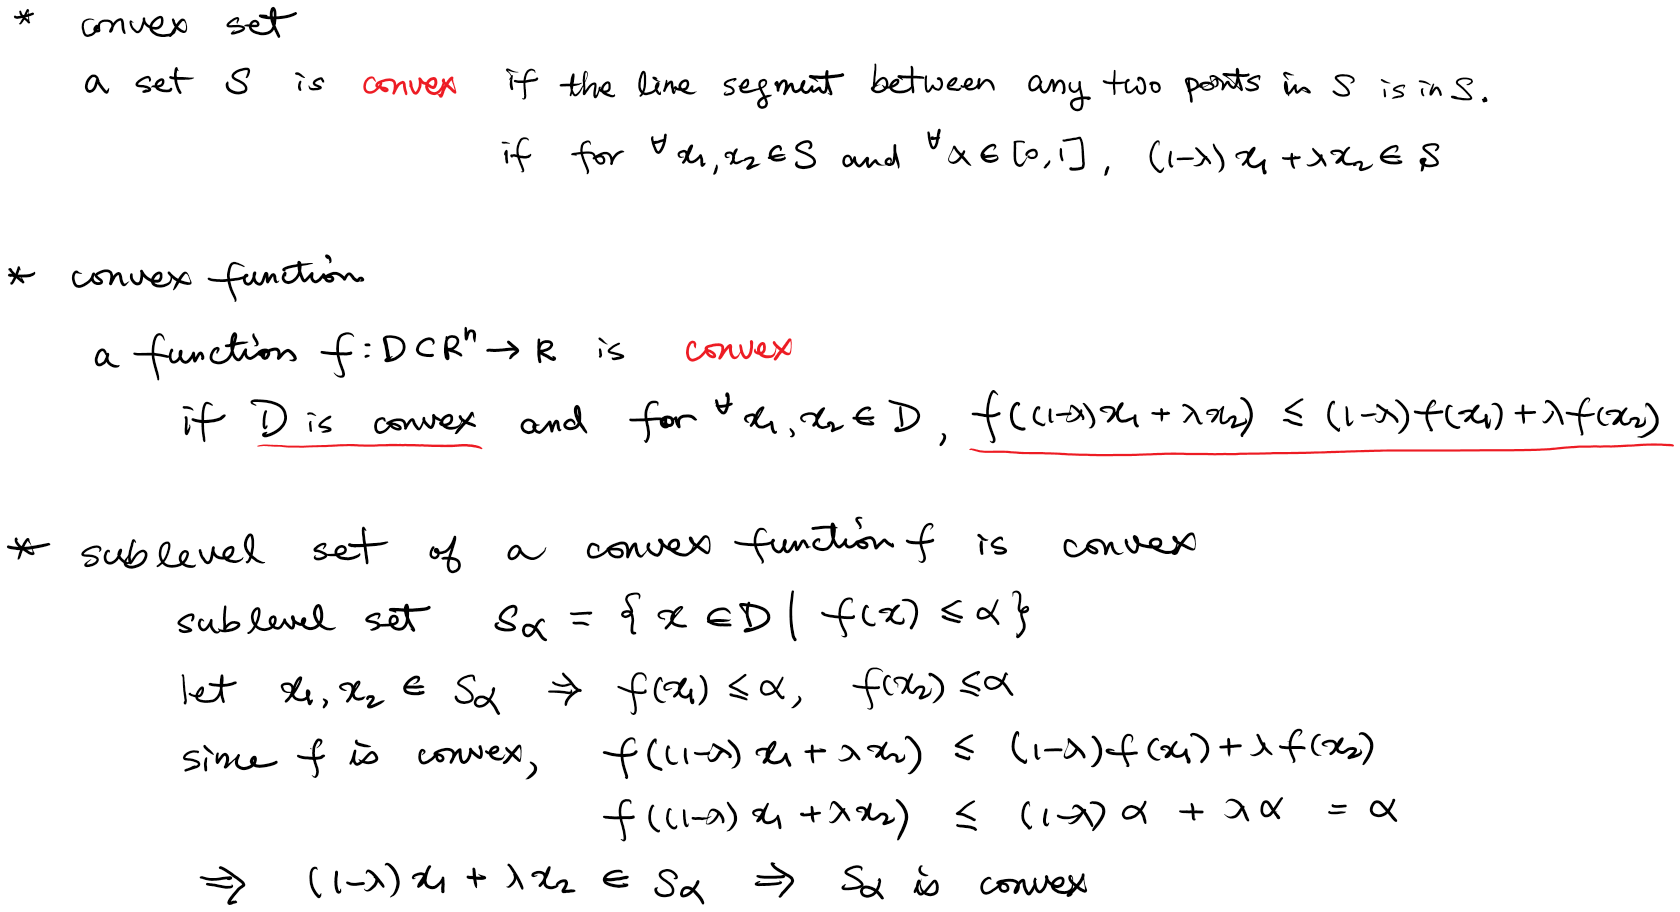

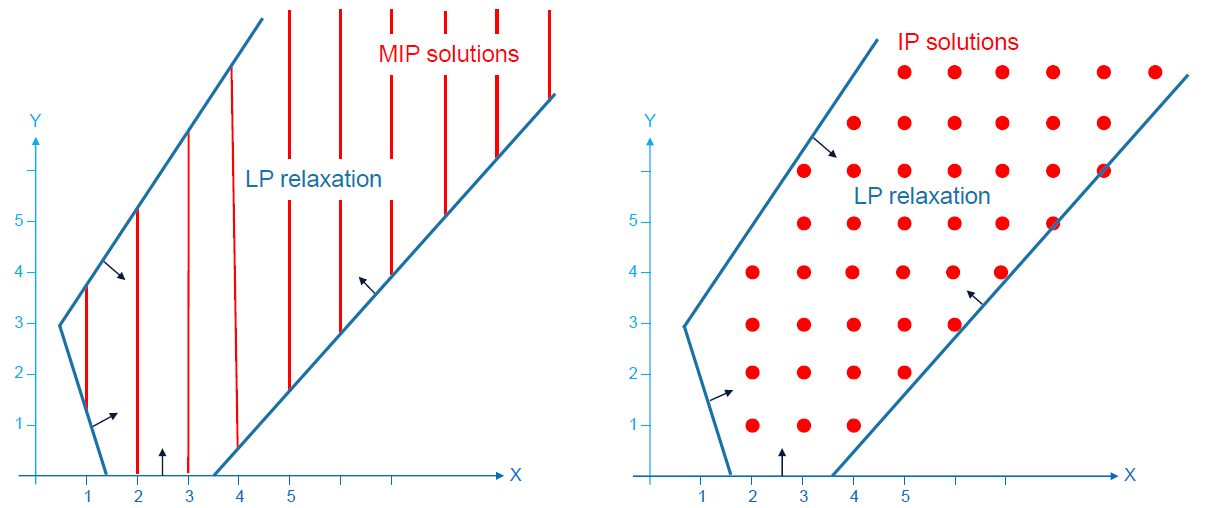

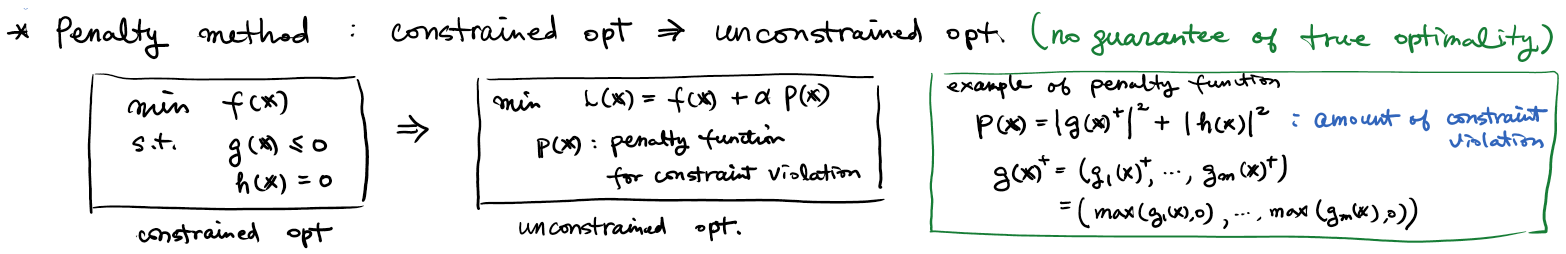

#### Solvers for constrained opt.
- Equiped with popular solution algorithms
    * Simplex method
    * Interior point method
    * Branch-and-bound method
    * ...
- can solve Convex prog. and MILP
    * can handle quite large scale problems 
- popular solvers are:
    * CPLEX - IBM
    * Gurobi - Gurobi
    * Xpress-MP - FICO
    * Google ORTools - Google, free

#### Installing Gurobi
- simple (minimum) installation
    * no license is required (free version), which can handle upto 3000 variables
    * pip install gurobipy
    * conda install -c gurobi gurobi
- full installation
    * https://www.gurobi.com/downloads/gurobi-optimizer-eula/
    * either commercial or academic license is required
        * students can request academic license, which 

## 9-2. LP : an example
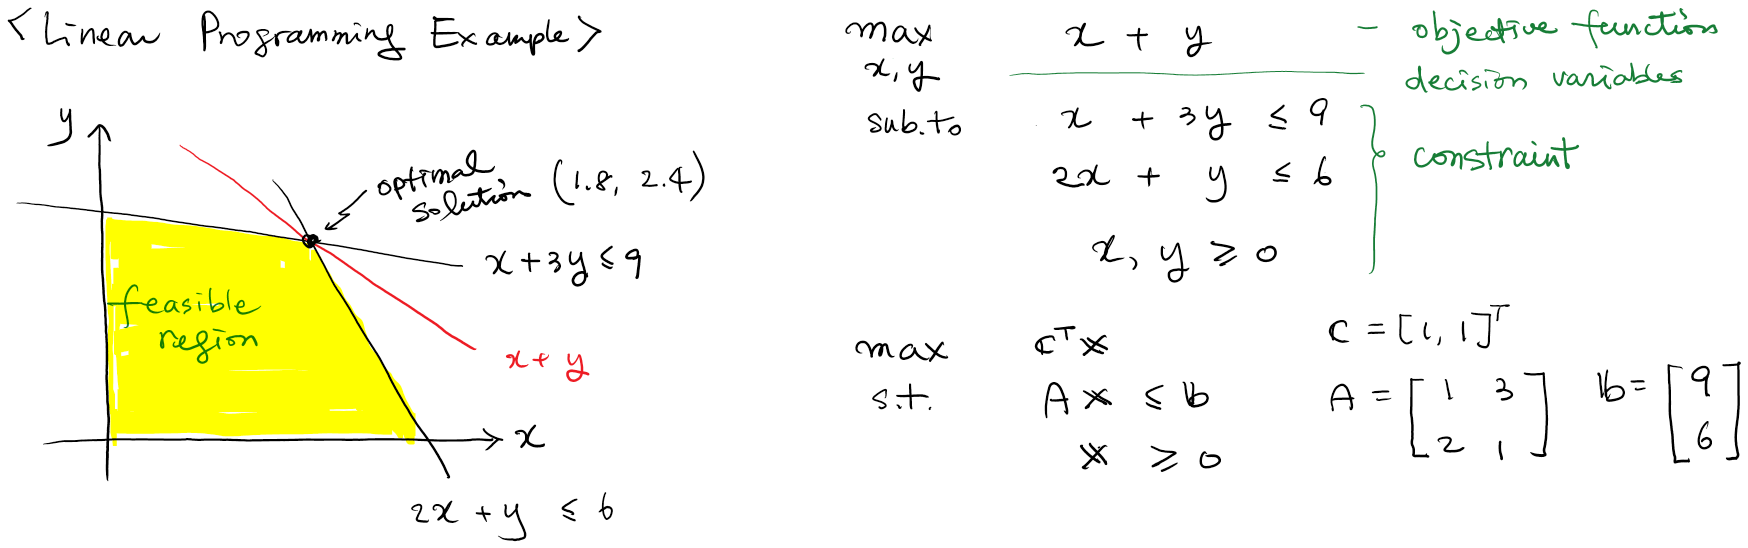

### 9-2-1. modeling LP in Gurobi 
* for the details, see tutorials or manuals from Gurobi
    * https://www.gurobi.com/documentation/
        * quick start guide
        * reference manual : https://www.gurobi.com/documentation/9.1/refman/index.html
        * example tour
    * https://www.gurobi.com/resource/python-i-webinar/
* modeling LP problems with Gurobi in Python   
    - m = gp.Model("name") : make a model
    - m.addVar : add a single variable
    - m.addVars : add an array of variables
    - m.addConstr : add a constraint
    - m.addConstrs : add multiple constraints
    - m.setObjective : set objective function
    - m.setParam : set parameter
    - m.optimize : solve
        - m.objVal : optimal objective value
        - var.x : optimal value of variable

In [1]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB

In [3]:
try:
    # Create a new model
    m = gp.Model("LP_example1")

    # Create variables
    x = m.addVar(name="x") # continous unlimited var 
    y = m.addVar(name="y") # continous non-negative var 

    # set objective
    m.setObjective(x+y, GRB.MAXIMIZE)
    
    # Add constraints
    m.addConstr(x + 3*y <= 9)
    m.addConstr(2*x + y <= 6)

    # Optimize model
    m.setParam(GRB.Param.TimeLimit, 120.0)
    m.optimize()

    print(f'objective value = {m.objVal:.2f}')
    print(f'var(x,y) = ({x.x:.2f}, {y.x:.2f})')
    
except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-09
Set parameter TimeLimit to value 120
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x97097c81
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 9e+00]
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+30   2.500000e+30   2.000000e+00      0s
       2    4.2000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.200000000e+00
objective value = 4.20
var(x,y) = (1.80, 2.40)


### 9-2-2. modeling LP in matrix form
* modeling LP problems in matrix with Gurobi in Python   
    - prepare coefficient matrices A, b, c
        - numpy array
        - scipy.sparse : sparse array
    - x = m.addMVar(shape=2, name="var")
        * add a vector (or matrix) variable of shape=(2)
        * x.X : vector (or matrix) of solution values 
    - m.addConstr(A @ x <= b)
        * linear contraint in a matrix form
    - m.setObjective(c @ x, gp.GRB.MAXIMIZE)

In [6]:
try:
    # Create a new model
    m = gp.Model("LP_matrix")

    A = np.array([[1,3],[2,1]])
    b = np.array([9,6])
    c = np.array([1,1])
    
    # Create variables
    x = m.addMVar(shape=2, name="x") # continous non-negative var 

    # set objective
    m.setObjective(c @ x, GRB.MAXIMIZE)
        
    # Add constraints
    m.addConstr(A @ x <= b)

    # Optimize model
    m.setParam('OutputFlag', 0)
    m.optimize()

    print(f'objective value = {m.objVal:.2f}')
    print(f'x = ', x.X)
    
except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

objective value = 4.20
x =  [1.8 2.4]


## 9-3. Combinatorial Optimization
### combinatorial optimization 
* finding a combination of decision variables 
    - which maximizes objective function
    - while satisfying constraints
    
### popular examples of combinatorial optimization problems
- constraint satisfaction problem : no objective function
    * n-queen problem
- knapsack problem
- assignment problem
- traveling salesman problem
- ...

### formulation as an IP or MIP
- most of combinatorial optimization problems can be formulated as MIP (or MILP)
    * solving MILP of large size may take too much time (NP-hard)

#### complexity of an algorithm
- computational complexity is $O(f(n))$ (big-O notation)
    - computation time grows at the rate of $f(n)$
    - $n$ : size of problem
    * $O(1) \prec O(\log n) \prec O(n) \prec O(n\log n)\prec O(n^p) \prec O(2^n) \prec O(n!) ...$  
    * $O(n^p)$ : polynomial algorithm
    * $O(2^n), O(n!), ...$ : exponential algorithm
* __P vs NP__ ?  (informal introduction)
    * __P__ : set of problems that can be __solved__ in polynomial time  
    * __NP__ : set of problems whose candidate sol. can be __verified__ in polynomial time
        * __verification__ of a candidate : to check if a candidate is a solution of the problem
        * __NP-complete__: a special subset of NP. 
            * an NP-complete problem can be converted to another NP-complete problem
            * Boolean satisfiability problem (SAT), Knapsack problem, Hamiltonian path problem, Travelling salesman problem (decision version), Subgraph isomorphism problem, Subset sum problem, Clique problem, Vertex cover problem, Independent set problem, Dominating set problem, Graph coloring problem
        * cf. __NP-hard__: no known polynomial time algorithm for __finding or verifying solution__ 
    * conjecture : __P $\ne$ NP__ ?
        * not proven yet.  $1M prize for proving (or disproving)
        * 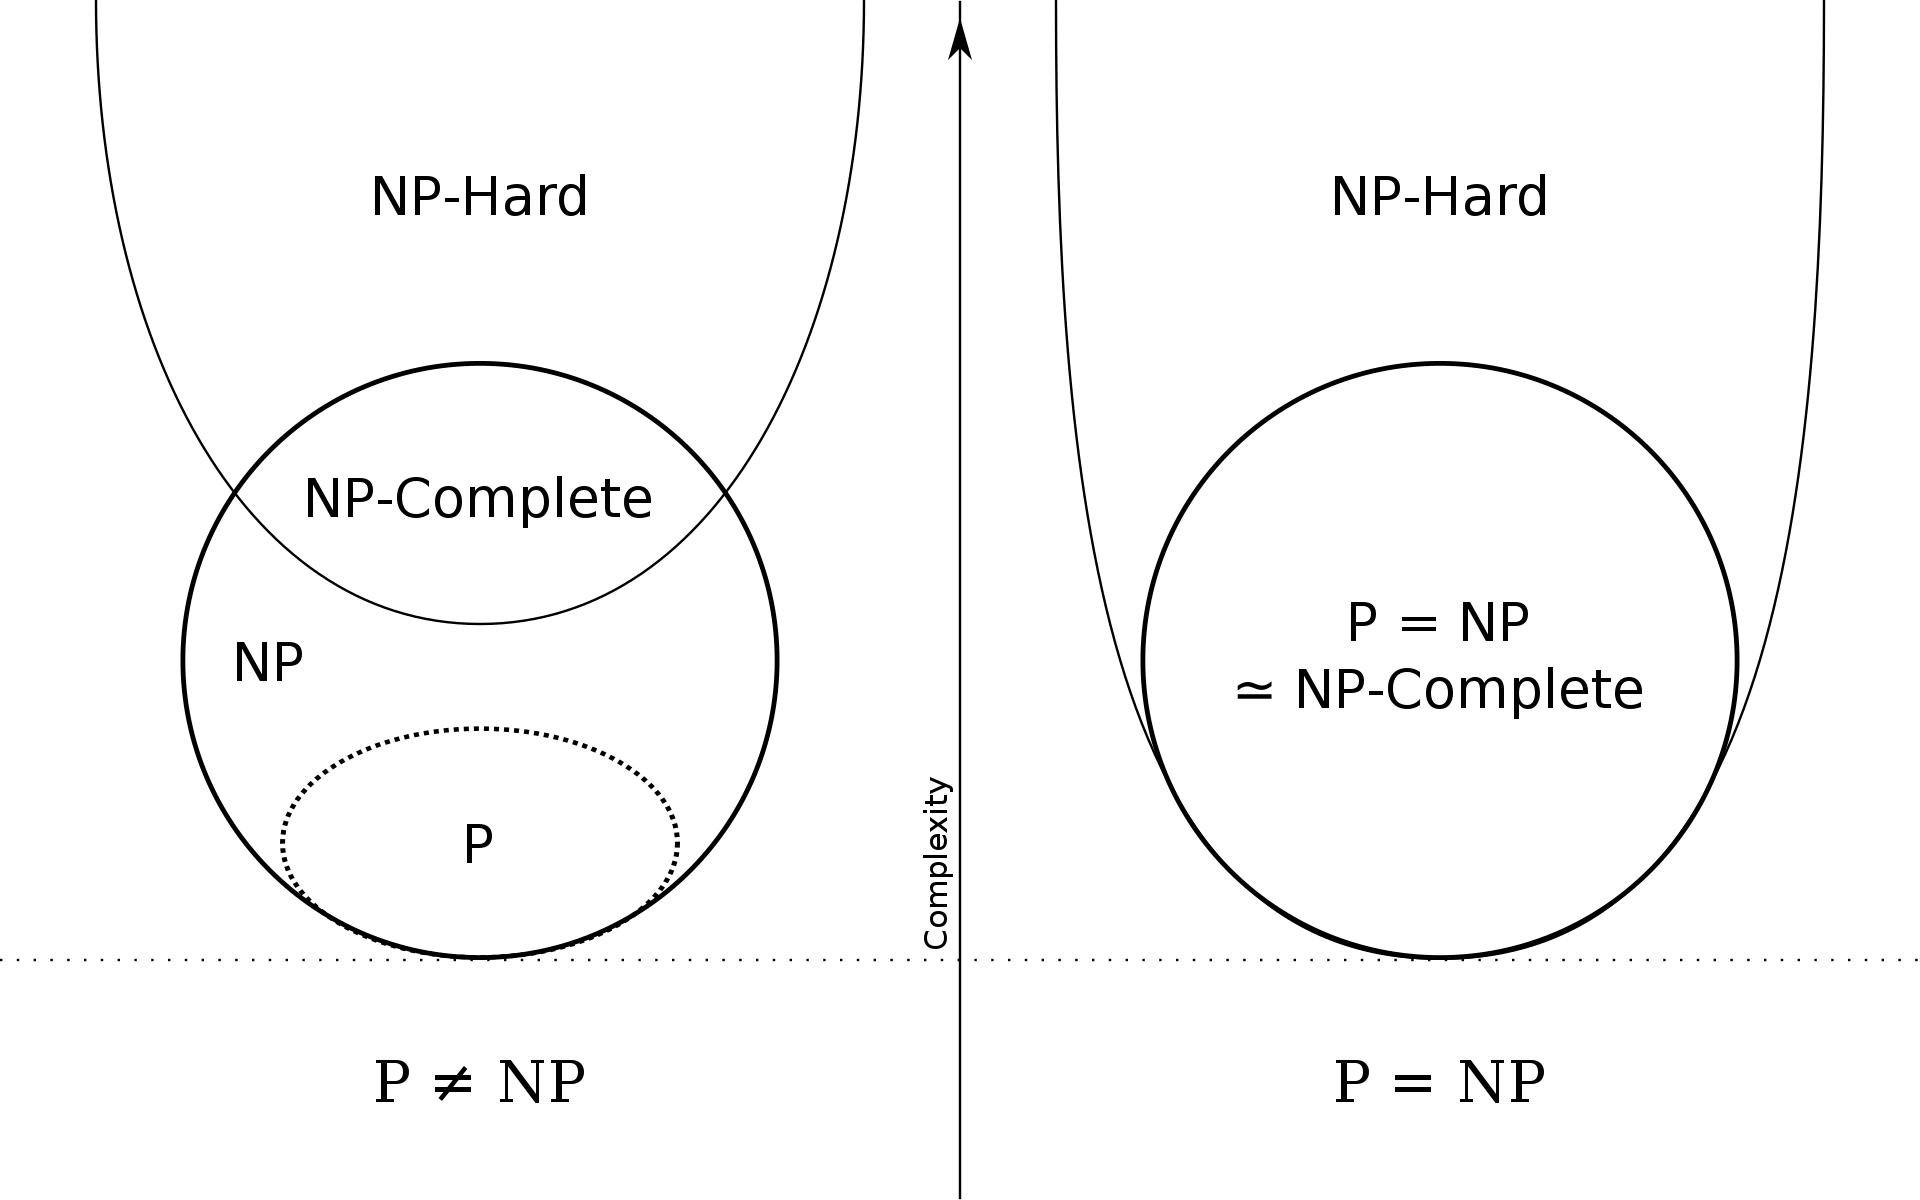

### 9-4. n-queen problem
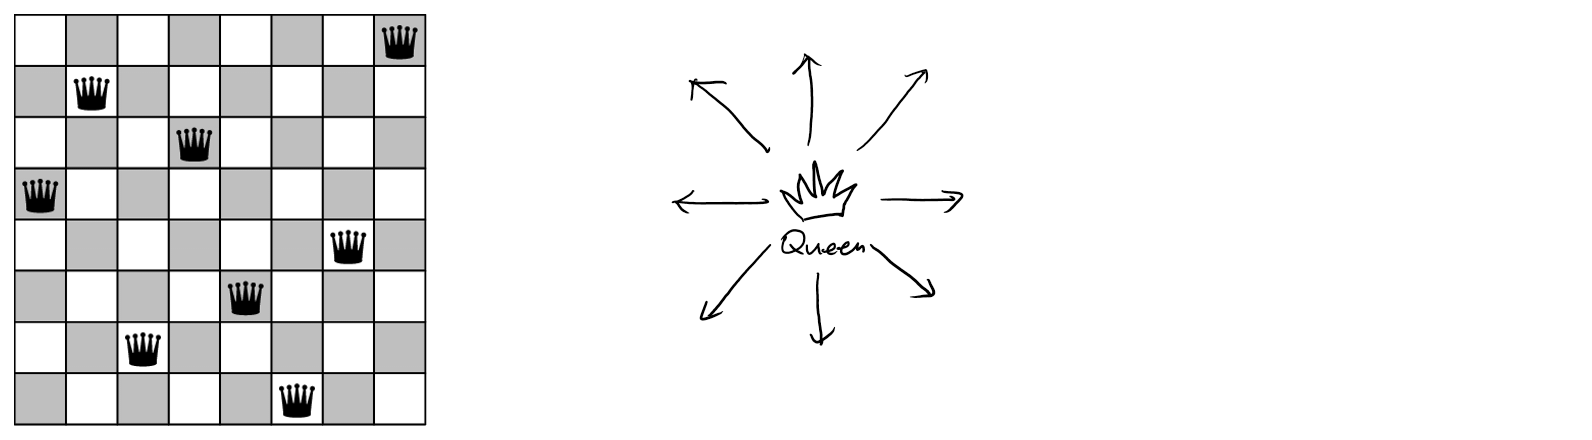
- n x n chessboard
    - $(i,j)$ : location of a cell on a chess board
        * $i,j \in P=\{0,...,n-1\}$
- allocate queens so that they don't threat each other
    - allocate as many queens as possible
- this can be formulated as an IP
    * decision varibles $x_{i,j}$ : binary {0,1}
        * $x_{i,j}=1$ : a queen is placed at $(i,j)$
    * objective function : # of queens placed
        * maximize $\sum_{i,j\in P}x_{i,j}$
    * constraints
        * at most 1 queen in a row : $\sum_{j \in P}x_{i,j} \leq 1, \forall i\in P$
        * at most 1 queen in a col : $\sum_{i \in P}x_{i,j} \leq 1, \forall j\in P$
        * at most 1 queen in a diagonal : $\sum_{i,j\in P, i-j=k}x_{i,j} \leq 1, \forall k \in \{-(n-2),...,n-2\}$
        * at most 1 queen in a anti-diagonal : $\sum_{i,j\in P, i+j=k}x_{i,j} \leq 1, \forall k \in \{1,...,2n-3\}$

In [29]:
# using addMVar (x: matrix variable)
try:
    # n-queen problem
    n = 100
    m = gp.Model("n_queen")

    # Create variables
    x = m.addMVar(shape=(n,n), vtype=GRB.BINARY, name="x")

    # set objective
    m.setObjective(x.sum(), GRB.MAXIMIZE)
        
    # Add constraints
    for i in range(n):  
        m.addConstr(x[i,:].sum() <= 1, name=f'row_{i}')
        m.addConstr(x[:,i].sum() <= 1, name=f'col_{i}')

    # diagonal constraints
    for k in range(-(n-2), n-1):
        Ri = range(max(k,0), min(n,k+n))  # i>=0, i-k>=0, i<=n-1, i-k<=n-1
        Rj = [i-k for i in Ri]
        m.addConstr(x[Ri,Rj].sum() <= 1, name=f'diag_{k}')
    for k in range(1, 2*n-2):
        Ri = range(max(k-n+1,0), min(n,k+1))  # i>=0, k-i>=0, i<=n-1, k-i<=n-1
        Rj = [k-i for i in Ri]
        m.addConstr(x[Ri,Rj].sum() <= 1, name=f'adiag_{k}')

    # Optimize model
    m.setParam(GRB.Param.TimeLimit, 300.0)
#     m.setParam('OutputFlag', 0)
    m.optimize()

    print(f'objective value = {m.objVal:.2f}')
    X = x.X
    print ("x = \n", X)
    
except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

Changed value of parameter TimeLimit to 300.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 594 rows, 10000 columns and 39996 nonzeros
Model fingerprint: 0xb2f80145
Variable types: 0 continuous, 10000 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 76.0000000
Presolve time: 0.04s
Presolved: 594 rows, 10000 columns, 40012 nonzeros
Variable types: 0 continuous, 10000 integer (10000 binary)

Root relaxation: objective 1.000000e+02, 1470 iterations, 0.15 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                     100.0000000 10000.0000  990

In [30]:
# using addVars  (array of variables)
try:
    # n-queen problem
    n = 100
    m = gp.Model("n_queen")

    # Create variables
    x = m.addVars(n, n, vtype=GRB.BINARY, name="x")

    # set objective
    m.setObjective(x.sum(), GRB.MAXIMIZE)
        
    # Add constraints
    R = range(n)
    m.addConstrs(x.sum(i, '*') <= 1 for i in R)
    m.addConstrs(x.sum('*', j) <= 1 for j in R)

    for k in range(-(n-2), n-1):
        Ri = range(max(k,0), min(n,k+n))  # i>=0, i-k>=0, i<n, i-k<n
        m.addConstr(gp.quicksum(x[i,i-k] for i in Ri) <= 1)
    for k in range(1, 2*n-2):
        Ri = range(max(k-n+1,0), min(n,k+1))  # i>=0, k-i>=0, i<n, k-i<n
        m.addConstr(gp.quicksum(x[i,k-i] for i in Ri) <= 1)

    # Optimize model
    m.setParam(GRB.Param.TimeLimit, 300.0)
#     m.setParam('OutputFlag', 0)
    m.optimize()

    print(f'objective value = {m.objVal:.2f}')
    X = np.zeros((n,n), dtype=int)
    for i,j in x.keys():
        X[i,j] = x[i,j].x
    print ("x = \n", X)
    
except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

Changed value of parameter TimeLimit to 300.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 594 rows, 10000 columns and 39996 nonzeros
Model fingerprint: 0x4cc4809b
Variable types: 0 continuous, 10000 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 76.0000000
Presolve time: 0.03s
Presolved: 594 rows, 10000 columns, 40012 nonzeros
Variable types: 0 continuous, 10000 integer (10000 binary)

Root relaxation: objective 1.000000e+02, 1225 iterations, 0.13 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                     100.0000000 10000.0000  990

## 9-5. Knapsack problem

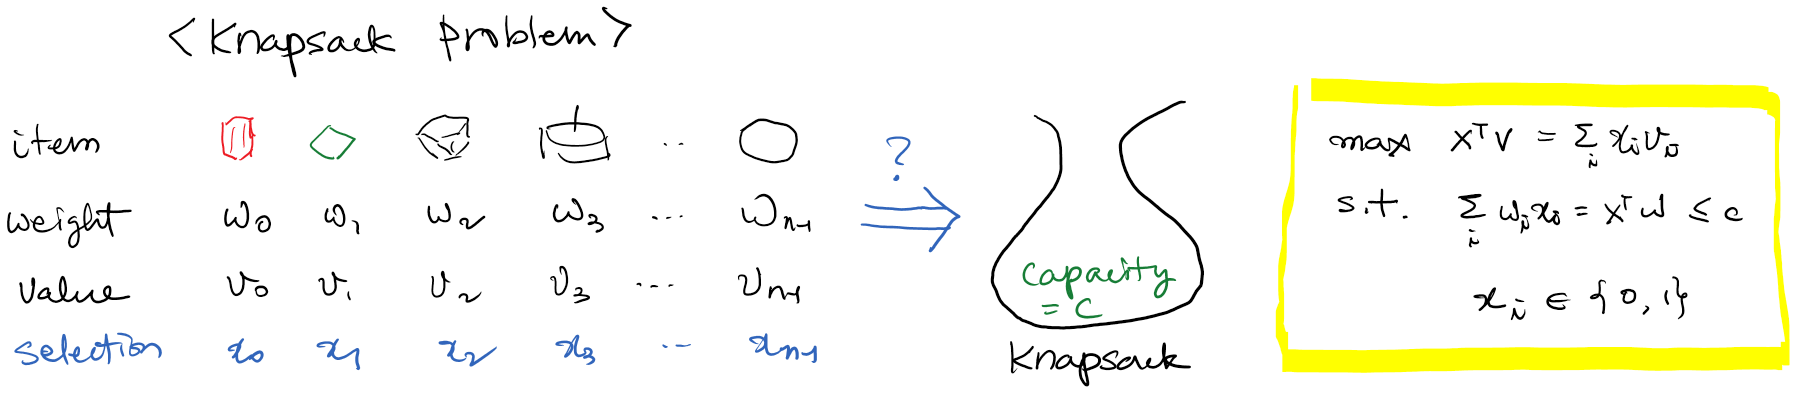

### 9-5-1. Greedy heuristic for knapsack
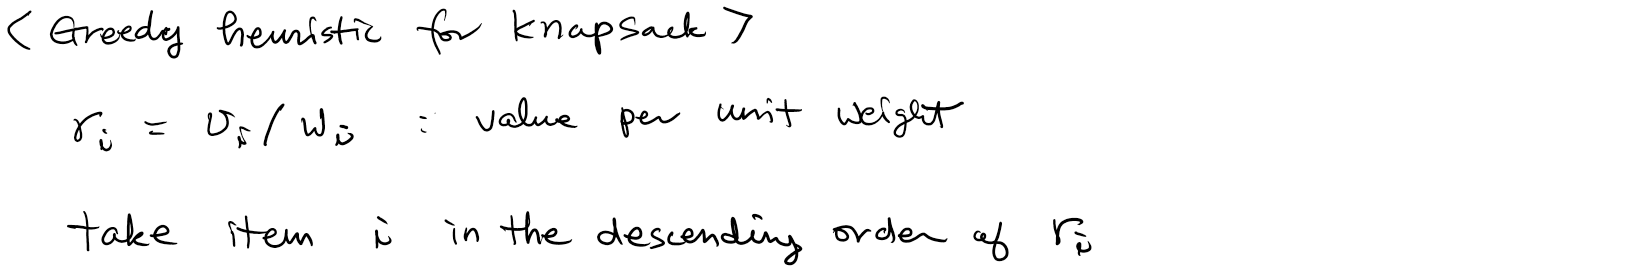

In [29]:
# v/w ratio heuristic
def knapsack_heuristic(n, v, w, c):
    r = v / w   # assumes numpy array for v, w
    aord = np.argsort(r)
    dord = aord[::-1]
    x = np.zeros(n, dtype=int)
    sumw = 0
    sumv = 0
    for i in range(n):
        k = dord[i]
        if sumw + w[k] <= c:
            sumw += w[k]
            sumv += v[k]
            x[k] = 1
    return sumv, x

In [15]:
# knapsack problem
n = 7
v = np.array([6, 5, 8, 9, 6, 7, 3])  # value array
w = np.array([2, 3, 6, 7, 5, 9, 4])  # weight array
c = 9  # capacity of knapsack

In [16]:
sumv, x = knapsack_heuristic(n, v, w, c)
print ("Heuristic solution")
print (f"sum of v = {sumv}")
print ("selection", x)

Heuristic solution
sum of v = 14
selection [1 1 0 0 0 0 1]


### 9-5-2. Knapsack using Gurobi

In [30]:
def knapsack_gurobi(n, v, w, c):
    try: # solving knapsack problem with Gurobi
        m = gp.Model("Knapsack")

        # var, obj, constr
        x = m.addMVar(shape=n, vtype=GRB.BINARY, name="x") # binary var 
        m.setObjective(v @ x, GRB.MAXIMIZE)
        m.addConstr(w @ x <= c, name='knapsack capacity')

        m.setParam(GRB.Param.TimeLimit, 20.0)
        m.setParam('OutputFlag', 0)
        m.optimize()

        sumv = m.objVal
        x_np = np.array([x.X[i] for i in range(n)])
        return sumv, x_np
    except gp.GurobiError as e:
        print('Error code ' + str(e.errno) + ': ' + str(e))

In [24]:
sumv, x = knapsack_gurobi(n, v, w, c)
print ("Gurobi IP solution")
print (f"sum of v = {sumv}")
print ("selection", x)

Set parameter TimeLimit to value 20
Gurobi IP solution
sum of v = 29.0
selection [1. 0. 1. 1. 1. 0. 0.]


### 9-5-3. Optimiality gap of greedy heuristic solution
- gap = (heuristic sol. - optimal sol.) / heuristic sol.
- what makes the gap large?
    * variance of __v__
    * variance of __w__

In [41]:
def generate_knapsack_problem(n_items, v_mu, v_sigma, w_mu, w_sigma):
    v = v_mu + v_sigma*np.random.randn(n_items)
    w = w_mu + w_sigma*np.random.randn(n_items)
    m = np.random.randint(1,5, n_items)
    return v, w, m

In [42]:
def diff_knapsack_sol(n_items, v, w, c):
    sumv_h, x_h = knapsack_heuristic(n_items, v, w, c)
#     print (f"Heuristic solution, sum of v = {sumv_h}")

    sumv_g, x_g = knapsack_gurobi(n_items, v, w, c)
#     print (f"Gurobi solution, sum of v = {sumv_g}")
    gap = (sumv_g - sumv_h) / sumv_g
    return sumv_h, sumv_g, gap

In [43]:
def compare_knapsack_sol(n_items, v_mu, v_sigma, w_mu, w_sigma, c, n_repeat):
    h_list = []
    g_list = []
    gap_list = []
    for i in range(n_repeat):
        v, w, _ = generate_knapsack_problem(n_items, v_mu, v_sigma, w_mu, w_sigma)
        h, g, gap = diff_knapsack_sol(n_items, v, w, c)
        h_list.append(h)
        g_list.append(g)
        gap_list.append(gap)
        
    print ("Heuristic sol. mean = ", sum(h_list)/n_repeat)
    print ("Gurobi sol. mean = ", sum(g_list)/n_repeat)
    print ("Gap mean = ", sum(gap_list)/n_repeat*100)
    

In [ ]:
c = 5000
n_items = 50
v_mu = 1000
v_sigma = 100
w_mu = 1000
w_sigma = 100

compare_knapsack_sol(n_items, v_mu, v_sigma, w_mu, w_sigma, c, 20)

### 9-5-4. Knapsack problem with item multiplicity
- a number of item $i$ is available
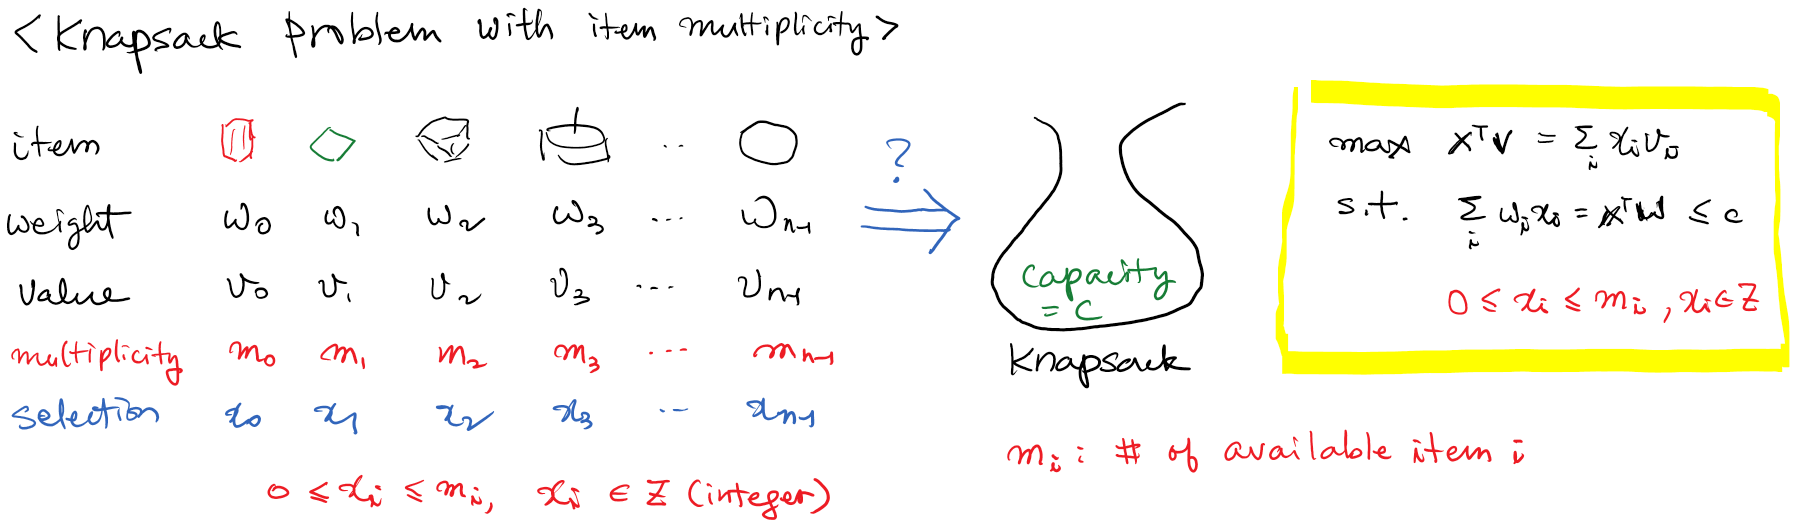

In [47]:
def knapsack_mult_gurobi(n, v, w, m, c):
    try: # solving knapsack problem with Gurobi
        gm = gp.Model("Knapsack")

        # var, obj, constr
        x = gm.addMVar(shape=n, vtype=GRB.INTEGER, ub=m, name="x") # integer var 
        gm.setObjective(v @ x, GRB.MAXIMIZE)
        gm.addConstr(w @ x <= c, name='knapsack capacity')

        gm.setParam(GRB.Param.TimeLimit, 20.0)
#         gm.setParam('OutputFlag', 0)
        gm.optimize()

        sumv = gm.objVal
        x_np = np.array([x.X[i] for i in range(n)])
        return sumv, x_np
    except gp.GurobiError as e:
        print('Error code ' + str(e.errno) + ': ' + str(e))

In [48]:
# knapsack problem
n = 7
v = np.array([6, 5, 8, 9, 6, 7, 3])  # value array
w = np.array([2, 3, 6, 7, 5, 9, 4])  # weight array
m = np.array([3, 2, 1, 4, 2, 1, 2])  # multiplicity array
c = 20  # capacity of knapsack

In [49]:
sumv, x = knapsack_mult_gurobi(n, v, w, m, c)
print ("Gurobi IP solution for knapsack with multiplicity")
print (f"sum of v = {sumv}")

print ("selection", x)

Set parameter TimeLimit to value 20
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 7 columns and 7 nonzeros
Model fingerprint: 0xde567f53
Variable types: 0 continuous, 7 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e+00, 9e+00]
  Objective range  [3e+00, 9e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective 36.0000000
Presolve removed 1 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 37 36 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.700000000000e+01, best bound 3.700000000000e+01, gap 0.0000%
Gurobi IP solution for knapsack with multiplicity
sum of v = 37.0
selection [ 3.  2.  0.  1.  0. -0.  0.]


In [50]:
n = 100
v, w, m = generate_knapsack_problem(n, 1000, 10, 1000, 20)
c = 5000
sumv, x = knapsack_mult_gurobi(n, v, w, m, c)
print ("Gurobi IP solution for knapsack with multiplicity")
print (f"sum of v = {sumv}")
print ("selection", x)

Set parameter TimeLimit to value 20
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 100 columns and 100 nonzeros
Model fingerprint: 0xf8f61b9f
Variable types: 0 continuous, 100 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+03, 1e+03]
  Objective range  [1e+03, 1e+03]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e+03, 5e+03]
Found heuristic solution: objective 5008.0333306
Presolve removed 0 rows and 39 columns
Presolve time: 0.00s
Presolved: 1 rows, 61 columns, 61 nonzeros
Found heuristic solution: objective 5086.2384166
Variable types: 0 continuous, 61 integer (16 binary)
Found heuristic solution: objective 5092.7446946

Root relaxation: objective 5.234007e+03, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/

## 9-6. Traveling Salesman Problem
- For a given set of $n$ cities, find the shortest tour visiting all cities once and only once.
    - $J = \{0, 1, ..., N-1\}$ : set of cities to visit
    - $D$ : distance $N \times N$, symmetric matrix
        * $D_{ij}$ : distance from $i$ to $j$
- NP-complete problem

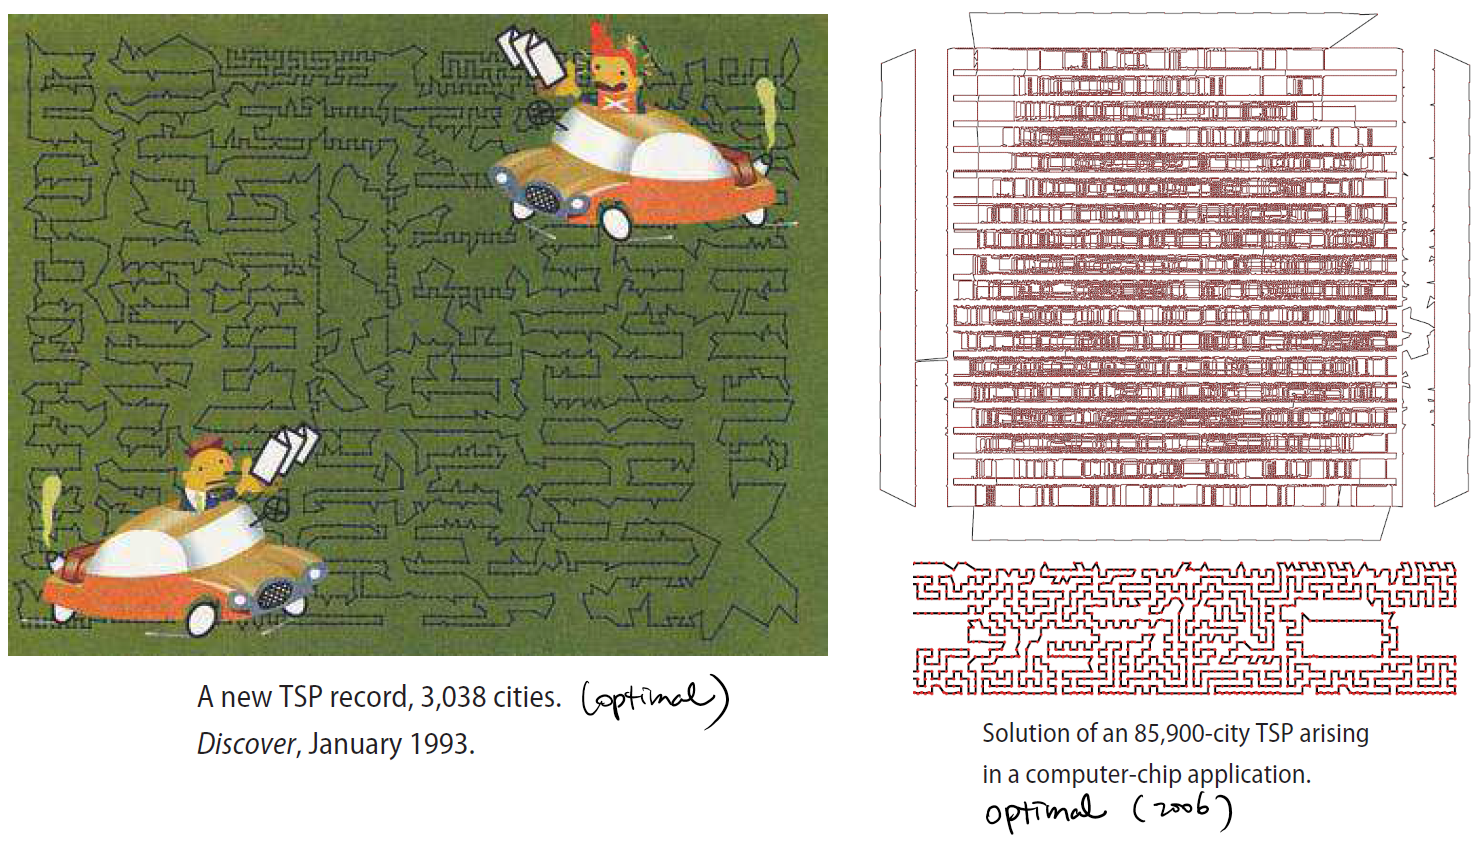

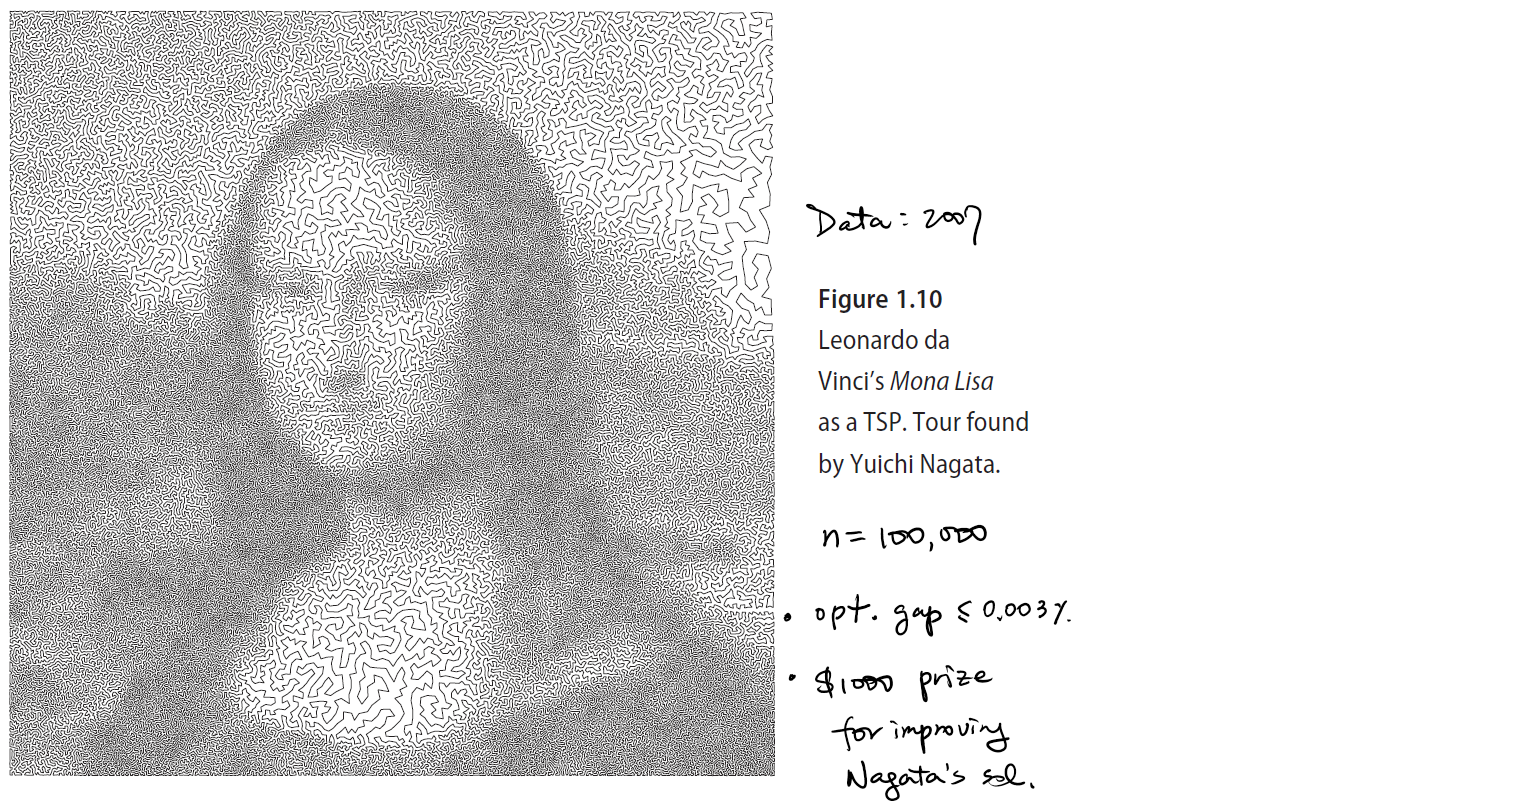

### 9-6-1. Heuristics to solve TSP
- __Greedy__ (nearest neighbor)
    * longer connections will remain at later stages    
- __2-opt__ : simple and powerful, __recommended heuristic method__
    * start from an initial tour : random or greedy
    * for all pair of edges in the tour 
        * cut them and swap
        * accept it if it is shorter  
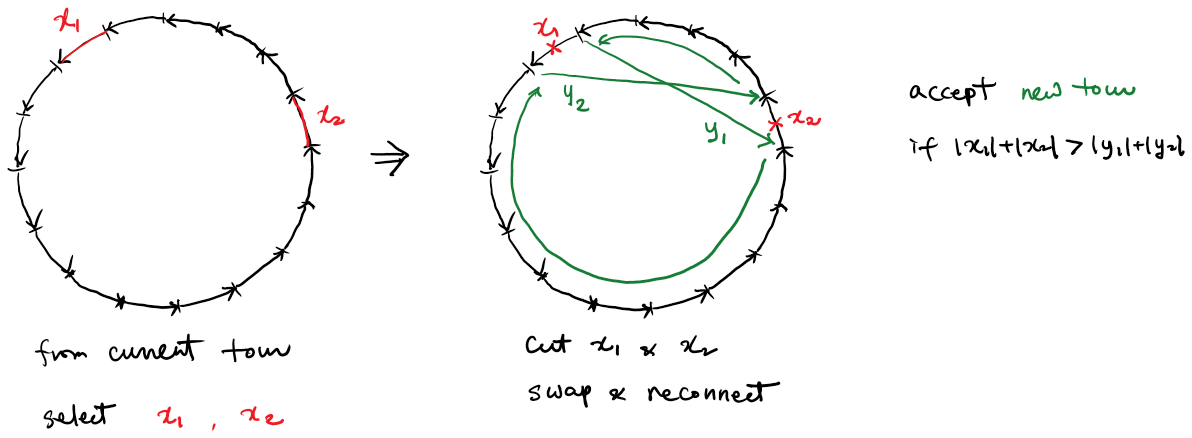

- __3-opt__ : select 3 edges to cut
    * 7 possible reconnections
    * accept valid and improving reconnection
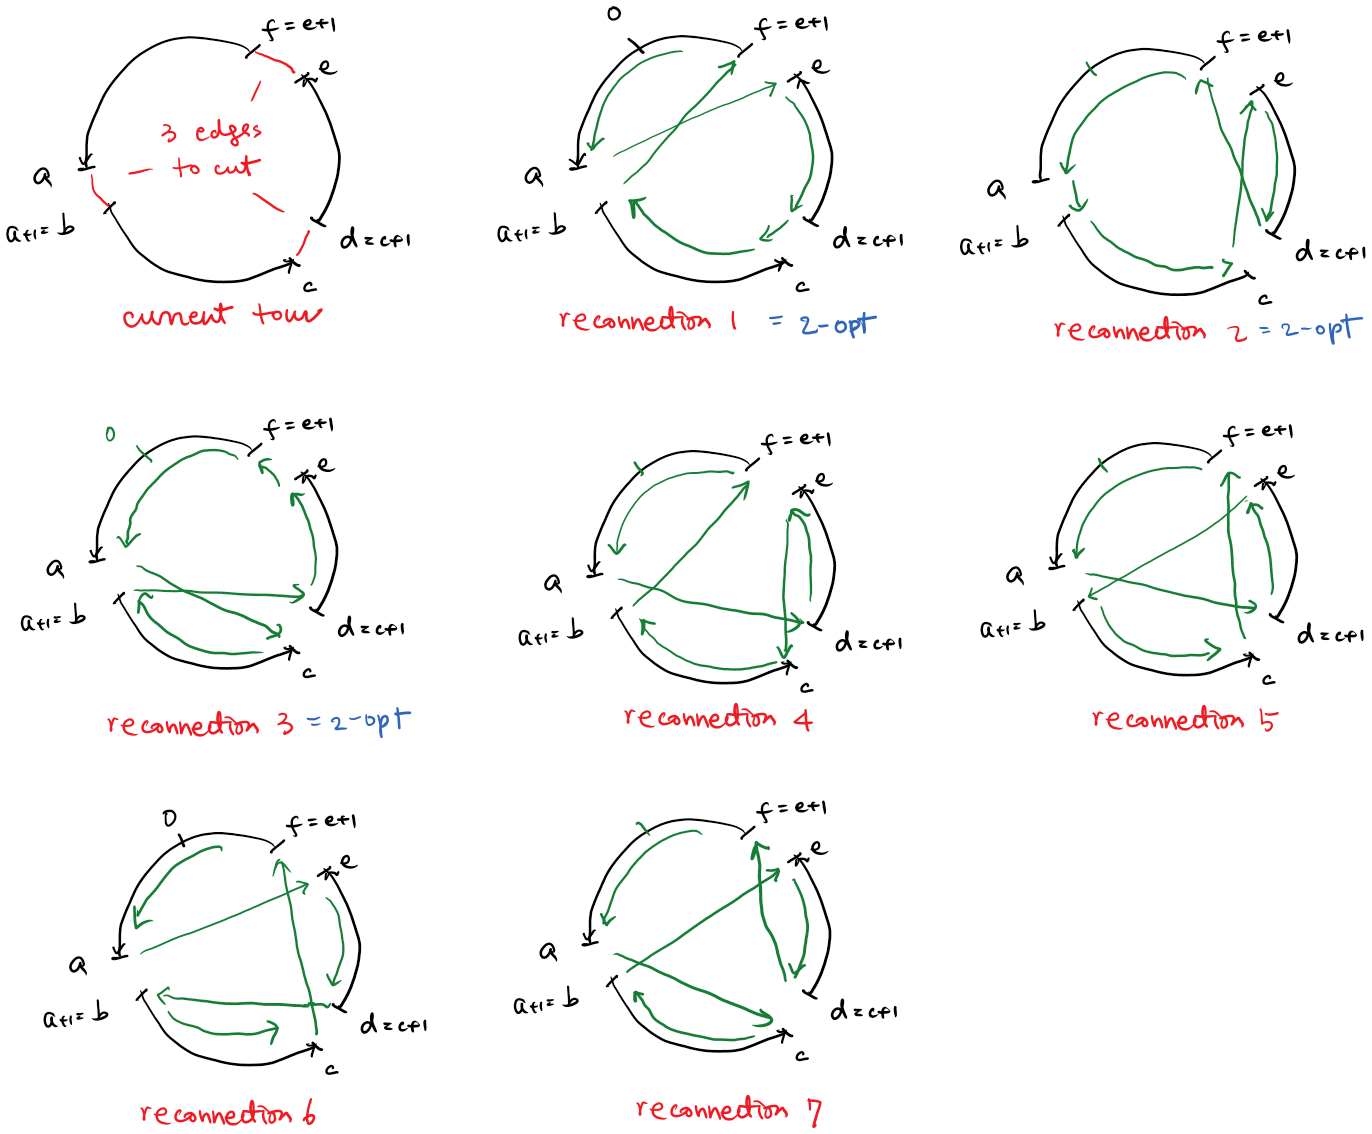

- __Lin-Kernigan__ (OR, 1973)
    * known as L-K algorithm
    * adaptive k-opt
    * very powerful, but difficult to implement
    * schematic illustration for L-K k-opt (_In pursuit of traveling salesman_ by W.Cook, 2012)
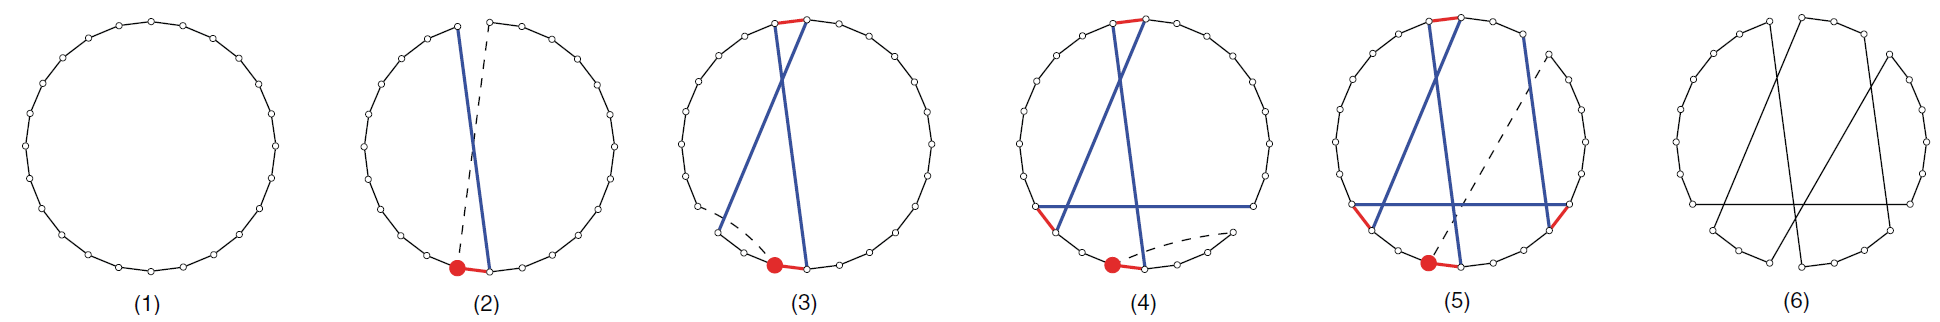

- __Lin-Kernigan-Helsgaun__ (EJOR, 2000)
    * Helsgaun provideed an efficient implementation + modification to Lin-Kernigan
    * called LKH

### 9-6-2. Meta-heuristic algorithms to solve TSP
- Genetic algorithm
- Simulated annealing
- Ant colony optimization
- ...

### 9-6-3. MILP formulation of TSP
- many formulations
- we will use Miller–Tucker–Zemlin (MTZ) formulation
- problem data
    - $J = \{0, 1, ..., N-1\}$ : set of cities to visit
    - $D$ : distance $N \times N$, symmetric matrix
        * $D_{ij}$ : distance from $i$ to $j$
- decision variables
    - $x_{ij}$ : binary decision var
        * $x_{ij} = 1$ : travel from $i$ to $j$ in the solution
- objective function
    * $\min \sum_{i,j \in J}{D_{ij}x_{ij}}$
        * m.setObjective(gp.quicksum(x[i,j]*D[i,j] for j in range(N) for i in range(N)), GRB.MINIMIZE)
- constraints
    * $x_{ii}=0, \forall i \in J$ : no self-connection
    * $\sum_{i}{x_{ij}}=1, \forall j \in J$ : unique incoming edge
    * $\sum_{j}{x_{ij}}=1, \forall i \in J$ : unique outgoing edge
- preventing sub-tours
    * with the above constraints, disconnected subtours are possible
    * more variables and constraints are introduced
    * $u_i$ : __order of arrival__ at city $i$
        * $0 \leq u_i \leq N-1$ : continuous variable in $[0,N-1]$
        * $u_0 = 0$ : fix start city as $0$
    * $u_j \geq u_i + 1 - N(1-x_{ij}), \forall i,j \in J, j \ne 0 $
        * if $x_{i,j}=0$, $u_j \geq u_i + 1 - N$ : this constraint is redundant (meaningless) 
        * if $x_{i,j}=1$, $u_j \geq u_i + 1$ : actually $u_j = u_i + 1$ if $x_{i,j}=1$  

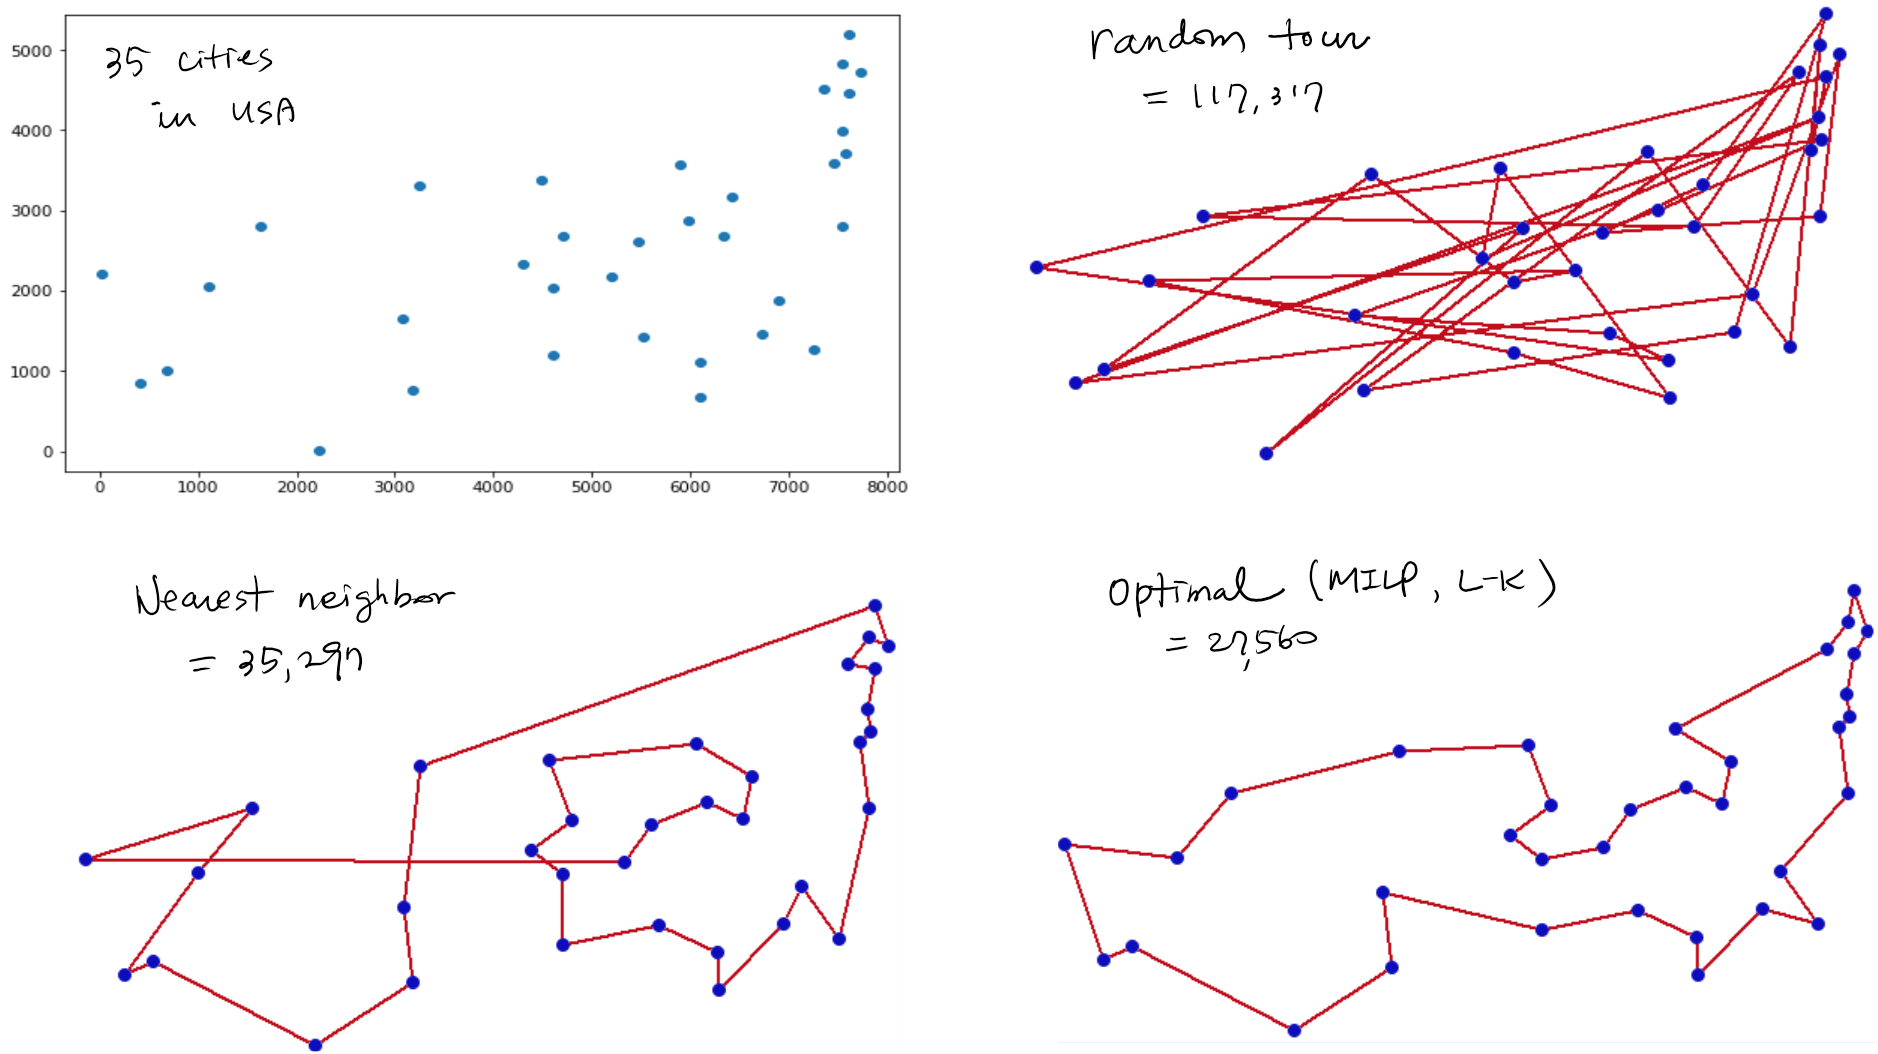

#### Solving TSP with Gurobi : Homework

#### Branch-and-bound method with a brief example
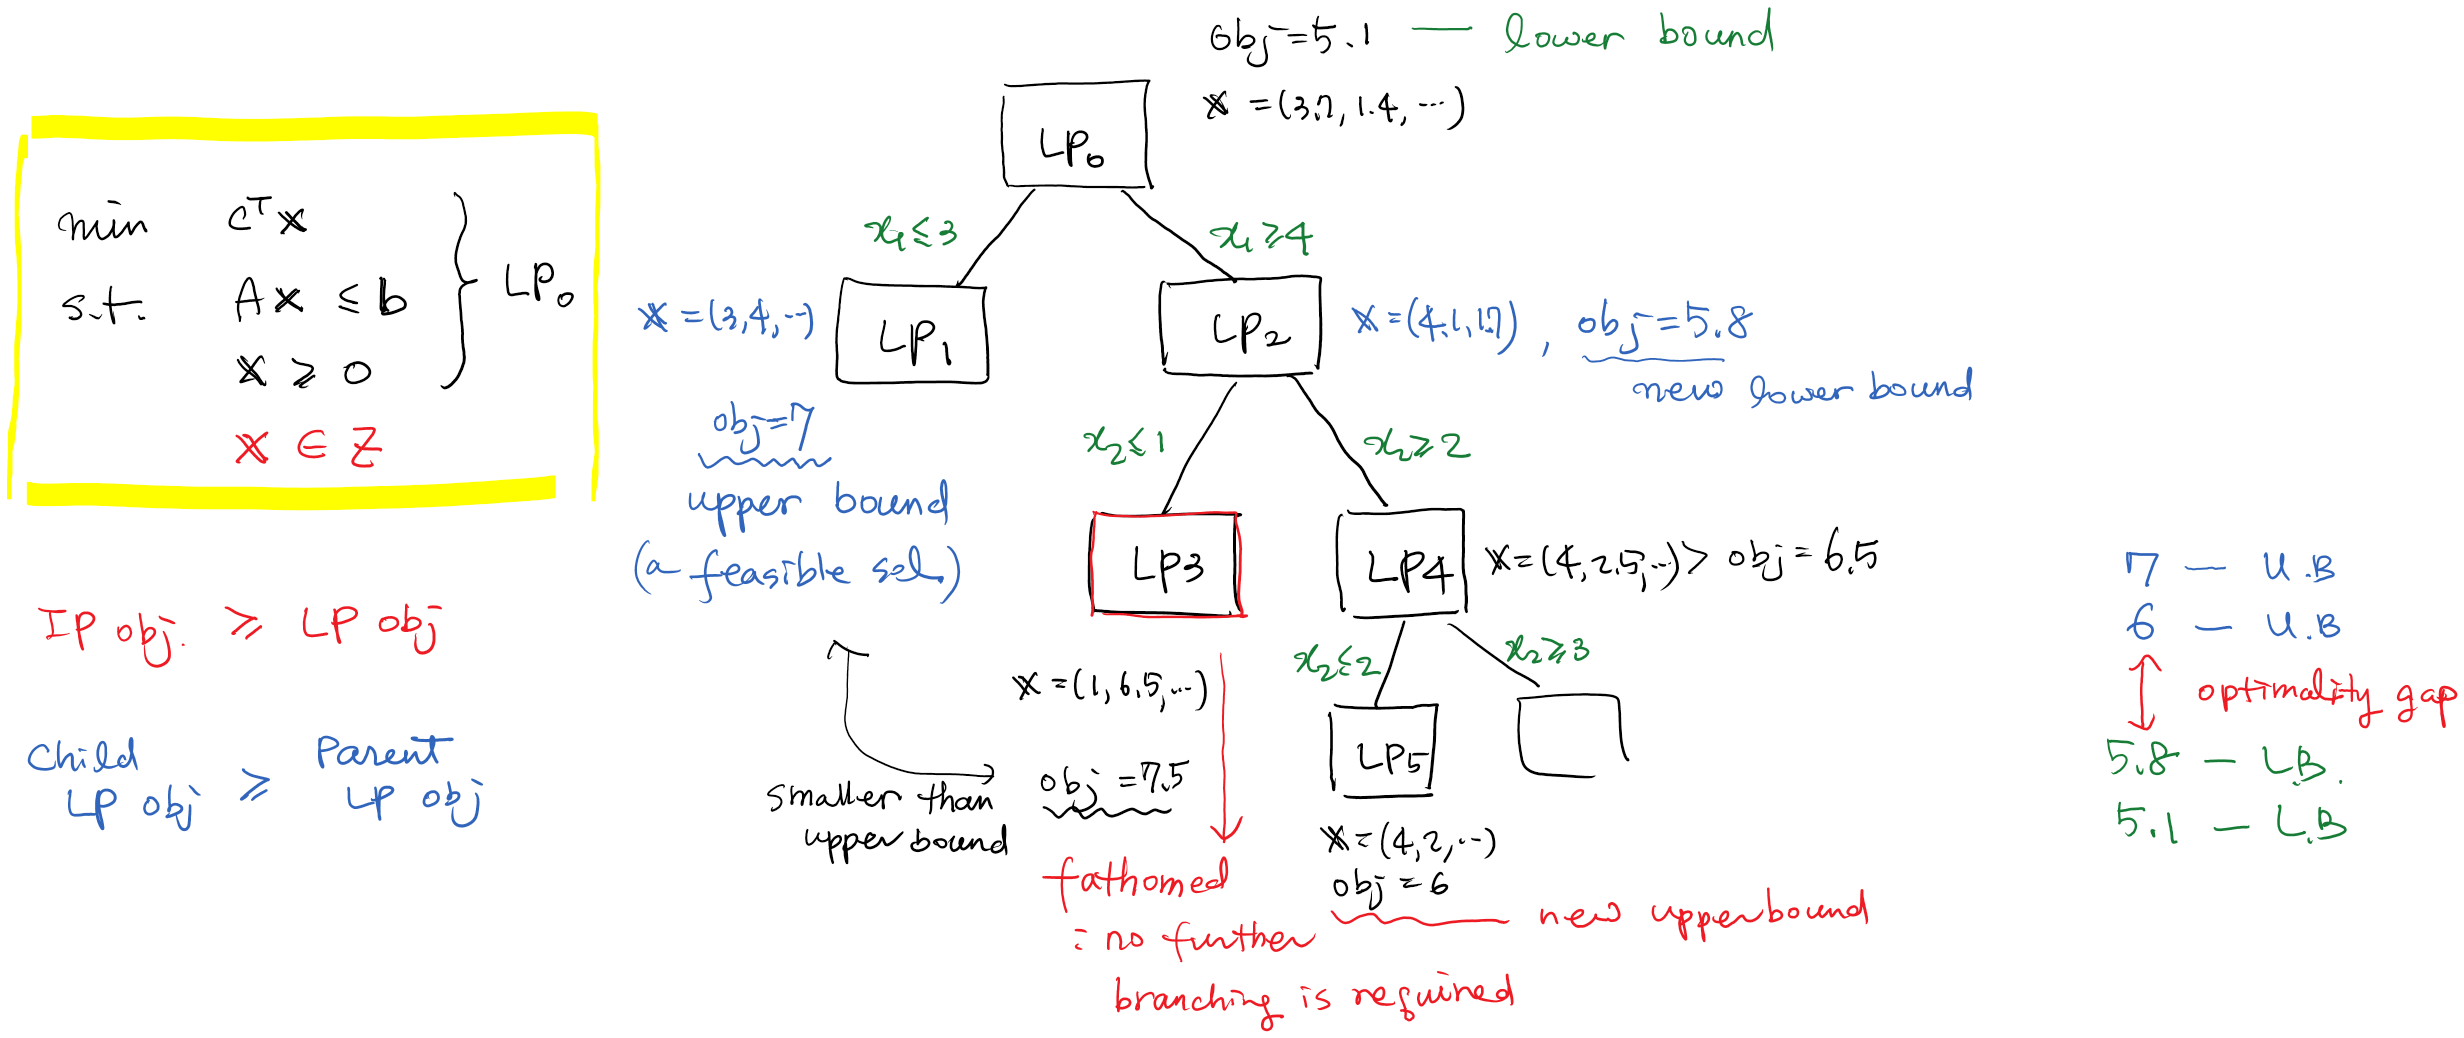